# MACHINE LEARNING: BÀI THỰC HÀNH SỐ 1

## 1. PHƯƠNG PHÁP NÄIVE BAYES CHO DỮ LIỆU RỜI RẠC

### Ví dụ 1: Phân loại văn bản

#### a. Dùng Multinomial Naive Bayes

In [1]:
from __future__ import print_function
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# train data
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])

# test data
d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

## call MultinomialNB
clf = MultinomialNB()
# training
clf.fit(train_data, label)

# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.89548823 0.10451177]]
Probability of d6 in each class: [[0.29175335 0.70824665]]


#### b. Sử dụng phương pháp NB Bernouli

In [2]:
from __future__ import print_function
from sklearn.naive_bayes import BernoulliNB
import numpy as np

# train data
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N']) # 0 - B, 1 - N

# test data
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

## call MultinomialNB
clf = BernoulliNB()
# training
clf.fit(train_data, label)
# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Predicting class of d6:', str(clf.predict(d6)[0]))
print('Probability of d5 in each class:', clf.predict_proba(d5))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.76554295 0.23445705]]
Probability of d6 in each class: [[0.16948581 0.83051419]]


### Ví dụ 2: Phân loại email SPAM – NOT.SPAM bằng Naïve Bayes

In [3]:
from __future__ import division, print_function, unicode_literals
import numpy as np
from scipy.sparse import coo_matrix  # for sparse matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score  # for evaluating results

# data path and file name
path = 'ex6DataPrepared/'
train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'
nwords = 2500


def read_data(data_fn, label_fn):
    # read label_fn
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]

    # read data_fn
    with open(path + data_fn) as f:
        content = f.readlines()
    # remove '\n' at the end of each line
    content = [x.strip() for x in content]

    dat = np.zeros((len(content), 3), dtype=int)

    for i, line in enumerate(content):
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])

    # remember to -1 at coordinate since we're in Python
    # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
    # for more information about coo_matrix function
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),\
            shape=(len(label), nwords))
    return (data, label)

(train_data, train_label) = read_data(train_data_fn, train_label_fn)
(test_data, test_label) = read_data(test_data_fn, test_label_fn)

clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)

print("MultinomialNB accuracy: ", accuracy_score(test_label, y_pred))

clf = BernoulliNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)

print("BernoulliNB accuracy: ", accuracy_score(test_label, y_pred))

MultinomialNB accuracy:  0.9807692307692307
BernoulliNB accuracy:  0.8538461538461538


## 2. PHƯƠNG PHÁP GAUSSIAN NAÏVE BAYES VỚI DỮ LIỆU LIÊN TỤC

### Ví dụ 3. Phân loại bộ dữ liệu hoa IRIS

#### a. Sử dụng Numpy & Pandas

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

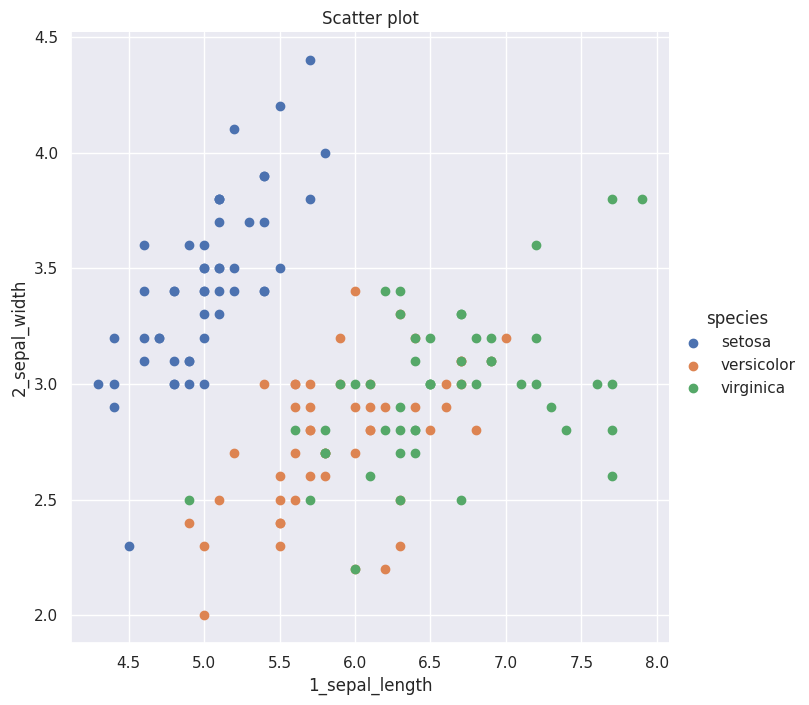

In [5]:
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", height=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", ) .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [6]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] )
                * pi_list[p])
        scores_list.append(score)
        
    return np.argmax(scores_list)

def predict_Bayes_class(X,mu_list,sigma_list):
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
        
    return np.argmax(scores_list)

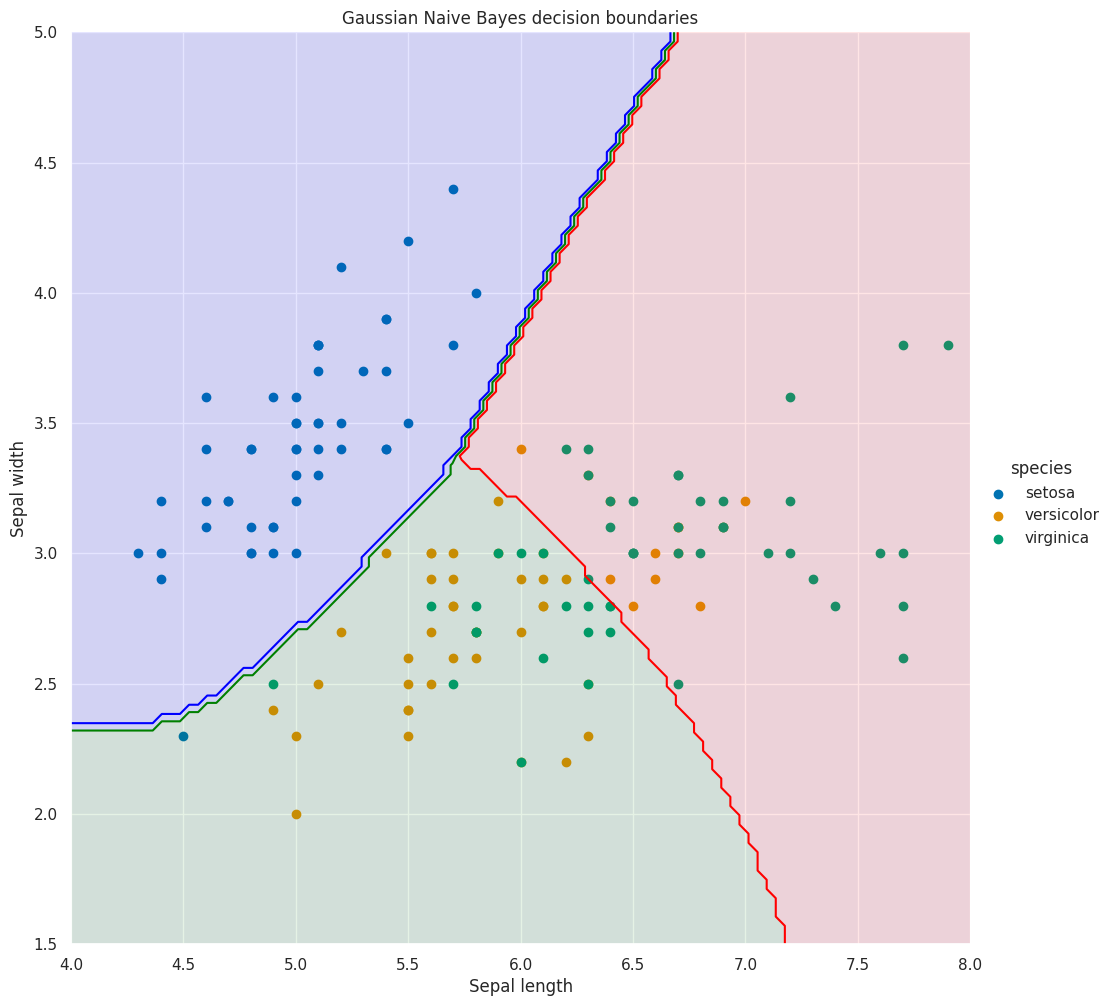

In [7]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",) .add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list)
for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Add axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

#### b. Sử dụng scikit-learning

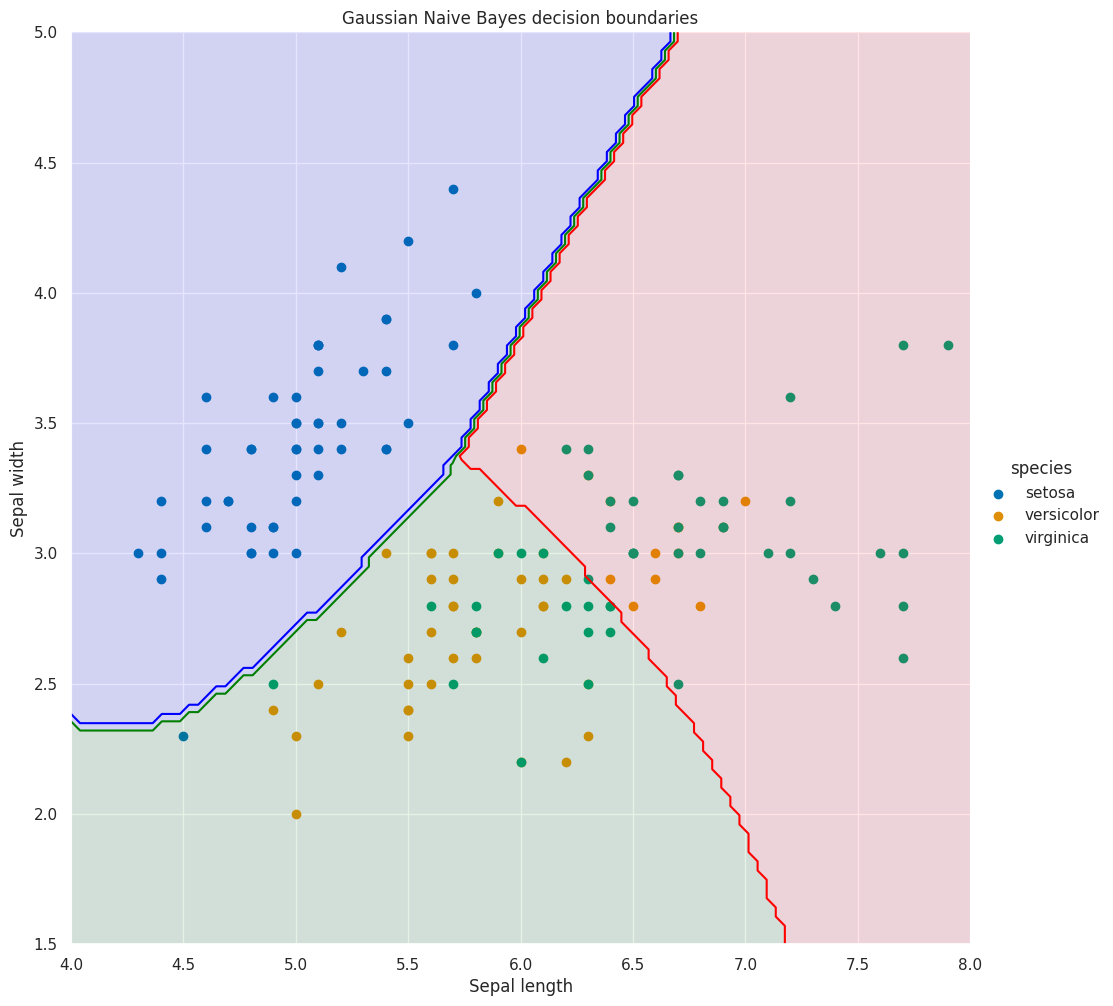

In [8]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data.values,y_labels)

# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",) .add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

## BÀI TẬP TỰ GIẢI: MÔ HÌNH PHÂN LOẠI NAÏVE BAYES

In [9]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Read data from cancer1/datacum.csv
data = pd.read_csv('cancer1/datacum.csv', header=None)

# Split the data into training/testing sets
x_test_benign = data[data[1] == 2].sample(n=80, random_state=1)
x_test_malignant = data[data[1] == 4].sample(n=40, random_state=1)
x_test = pd.concat([x_test_benign, x_test_malignant])
x_train = data.drop(x_test.index)

# Extract labels from the data
y_test = x_test.pop(1)
y_train = x_train.pop(1)

# Create and train Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(x_test)

# Compute the accuracy, precision and recall scores
print("Accuracy:  ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, pos_label=4))
print("Recall:    ", metrics.recall_score(y_test, y_pred, pos_label=4))

Accuracy:   0.975
Precision:  0.9302325581395349
Recall:     1.0
